# 국민권익위원회_민원빅데이터 분석정보

* 민원과 관련한 정보 공개
* 갑자기 늘어나고 있는 키워드(지역, 성, 별,등으로)
* 키워드 클라우드:특정 키워드와 연관된 키워드 클라우드를 조회할 수 있다.


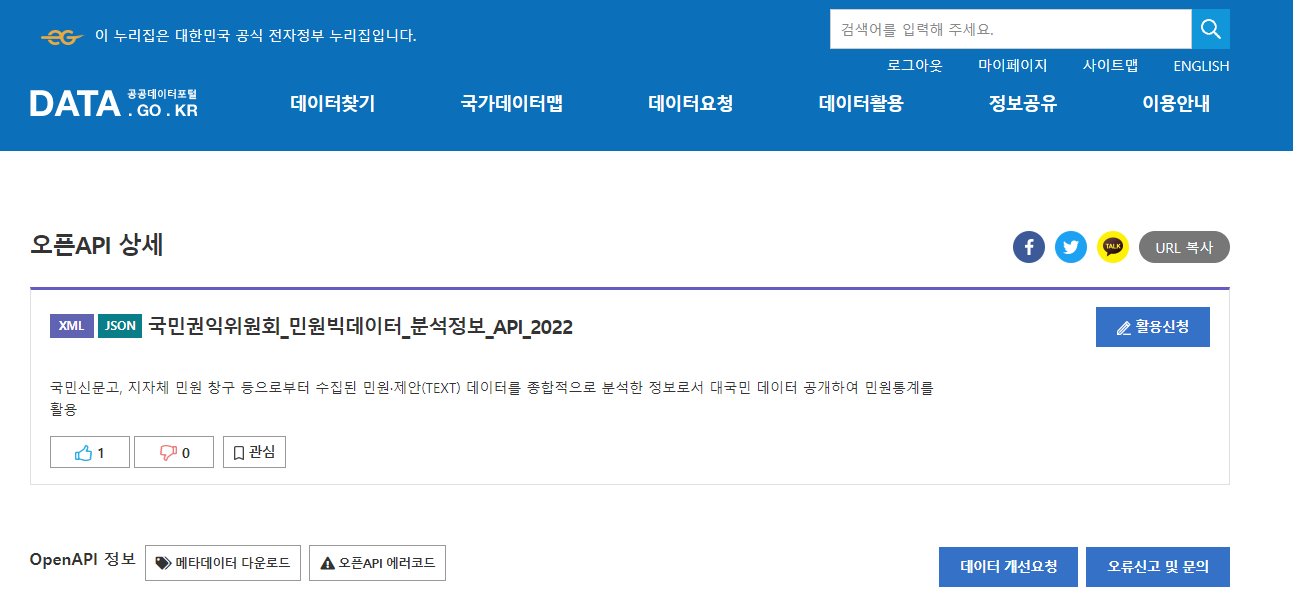

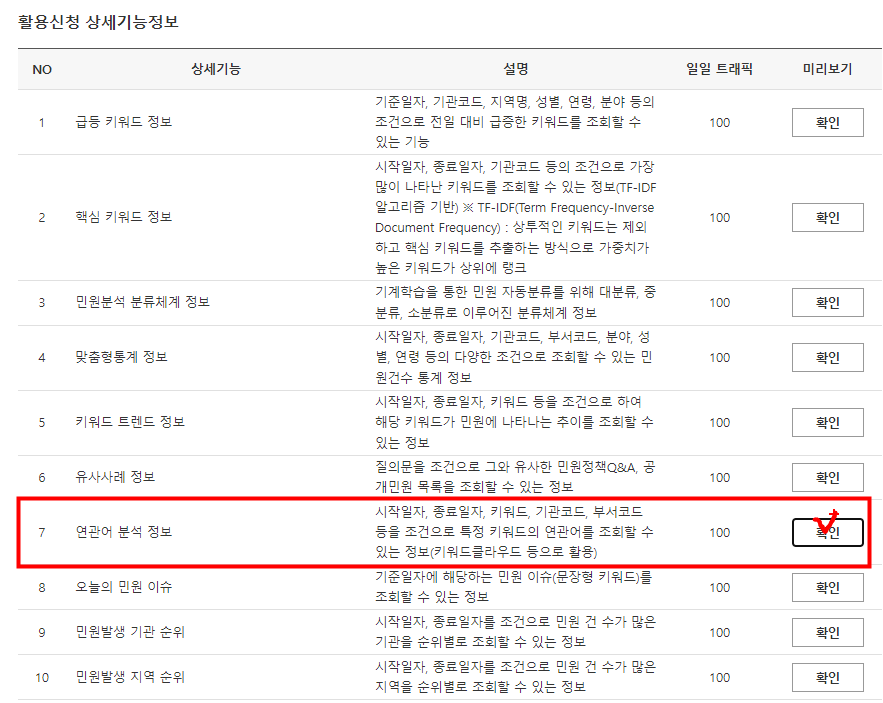

## 키워드 클라우드 서비스에서 데이터 가져옴

In [1]:
import pandas as pd
import requests
from urllib import parse
from bs4 import BeautifulSoup

ServiceKey = r'tC3v5Lh6ZoW7dJf6lzw9E13FhLwP5bgJ/cNDkqvzb3Rhj7t6OKUglYGYep5Va4WCJhm1BxXTA+CBURGJs79vZw=='

open_api = 'http://apis.data.go.kr/1140100/minAnalsInfoView5/minWdcloudInfo5'

# params = {'ServiceKey':ServiceKey,'searchword':'비타민','resultCount':50,'target':'pttn,dfpt,saeol','mainSubCd': 1342000, 'dateFrom': 20190101, 'dateTo': 20191231, 'dataType': 'json'}

params = {'ServiceKey':ServiceKey,'searchword':'건강','resultCount':1000,'target':'pttn,dfpt,saeol','dateFrom': 20190101, 'dateTo': 20191231}
res = requests.get(open_api, params=params)

print(res.url)
print(res.status_code)     # 200나오면 성공

if res.status_code != 200:
    print(f"{res.status_code} 에러 발생")

else:
    datas = res.json()

datas

http://apis.data.go.kr/1140100/minAnalsInfoView5/minWdcloudInfo5?ServiceKey=tC3v5Lh6ZoW7dJf6lzw9E13FhLwP5bgJ%2FcNDkqvzb3Rhj7t6OKUglYGYep5Va4WCJhm1BxXTA%2BCBURGJs79vZw%3D%3D&searchword=%EA%B1%B4%EA%B0%95&resultCount=1000&target=pttn%2Cdfpt%2Csaeol&dateFrom=20190101&dateTo=20191231
200


[{'label': '근로자', 'value': 83.85315},
 {'label': '산업안전보건법', 'value': 71.39829},
 {'label': '사업주', 'value': 56.703297},
 {'label': '보험료', 'value': 52.600452},
 {'label': '보건복지부', 'value': 37.09265},
 {'label': '사업장', 'value': 33.368702},
 {'label': '지역가입자', 'value': 22.581818},
 {'label': '보건소', 'value': 19.02242},
 {'label': '미세먼지', 'value': 18.811882},
 {'label': '과태료', 'value': 18.0},
 {'label': '대상자', 'value': 16.863905},
 {'label': '직장가입자', 'value': 16.5},
 {'label': '의료기관', 'value': 15.84},
 {'label': '고소인', 'value': 14.117647},
 {'label': '직장인', 'value': 14.117647},
 {'label': '지방자치단체', 'value': 13.901639},
 {'label': '검진비용', 'value': 13.235294},
 {'label': '운동기구', 'value': 12.93578},
 {'label': '피부양자', 'value': 12.675675},
 {'label': '송전탑', 'value': 12.6},
 {'label': '보건관리자', 'value': 12.5274725},
 {'label': '검사항목', 'value': 12.185185},
 {'label': '국가유공자', 'value': 12.0},
 {'label': '고용노동부', 'value': 11.579832},
 {'label': '수원시', 'value': 10.733334},
 {'label': '혜화 경찰서', 'value'

In [25]:
# 데이터가 어떻게 오는지. 타입이 무엇인지 확인하고 출력
# 딕셔너리로 바꾸기 전 먼저 확인 다 해보는 단계
type(datas), len(datas)
datas[0]

{'label': '수험생', 'value': 103.79919}

## 데이터 구조 변환
```
{'보건소': 53.861385,
 '지원금': 46.55422,
 '질병관리청': 40.373833,
 '보호자': 36.19737}
``````

In [2]:
data_dict = {item['label']: item['value'] for item in datas}
data_dict

{'근로자': 83.85315,
 '산업안전보건법': 71.39829,
 '사업주': 56.703297,
 '보험료': 52.600452,
 '보건복지부': 37.09265,
 '사업장': 33.368702,
 '지역가입자': 22.581818,
 '보건소': 19.02242,
 '미세먼지': 18.811882,
 '과태료': 18.0,
 '대상자': 16.863905,
 '직장가입자': 16.5,
 '의료기관': 15.84,
 '고소인': 14.117647,
 '직장인': 14.117647,
 '지방자치단체': 13.901639,
 '검진비용': 13.235294,
 '운동기구': 12.93578,
 '피부양자': 12.675675,
 '송전탑': 12.6,
 '보건관리자': 12.5274725,
 '검사항목': 12.185185,
 '국가유공자': 12.0,
 '고용노동부': 11.579832,
 '수원시': 10.733334,
 '혜화 경찰서': 10.5,
 '공공기관': 10.434783,
 '증명서': 10.363636,
 '사용중': 10.325582,
 '의료비': 10.105263,
 '건설사': 9.428572,
 '빨간색': 9.428572,
 '지중화': 9.404255,
 '사무직': 9.386666,
 '보건증': 9.305555,
 '국가보훈처장': 9.19403,
 '국민연금': 8.958333,
 '학부모': 8.936171,
 '장현지구 군자봉': 8.8,
 '즉슨 노출시 영향': 8.8,
 '시흥': 8.627451,
 '도시빌라': 8.611111,
 '소액 통장': 8.611111,
 '소액 통장 확인서': 8.571428,
 '개인정보': 8.529411,
 '동의서': 8.529411,
 '고압 송전선로': 8.387096,
 '불법주차': 8.311111,
 '외국인': 8.307693,
 '김용완': 8.076923,
 '국세청': 8.0240965,
 '경기체육회등': 8.0,
 '실내배드민턴장': 8.0,
 '의견

## 워드클라우드 함수 준비

pip install WordCloud

In [27]:
!pip install WordCloud

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for WordCloud from https://files.pythonhosted.org/packages/5a/5f/f4164295d6853ec6203bc728dea4da76a7145ba70482eab9e994d26e0e13/wordcloud-1.9.2-cp310-cp310-win_amd64.whl.metadata
   ---------------------------------------- 0.0/152.1 kB ? eta -:--:--
   ---------------------------------------- 152.1/152.1 kB 4.6 MB/s eta 0:00:00


In [35]:
# 불용어 - 자주 등장하지만 의미가 크지 않아 제외하고 싶은 텍스트
stopwords = ["", ""]

# 불용어를 제거하지 않고 그리려면 아래 주석을 풀어서 stopword 변수에 덮어쓰기를 합니다.
# stopwords = []
# displayWordCloud 라는 함수를 만들어 재사용합니다.
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path='./NanumGothic.ttf'
def displayWordCloud(data):
    wordcloud = WordCloud(
                        font_path = font_path, 
                        stopwords = stopwords,    # 불용어 (나오지 않았으면)
                        background_color = 'black', 
                        width = 1280, height = 768, 
                        random_state=42).generate(data)
    plt.figure(figsize = (6 , 4)) #이미지 크기
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

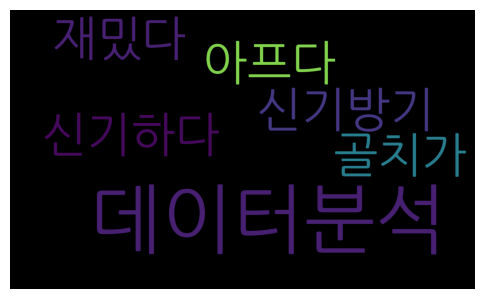

In [47]:
text = "데이터분석 재밌다.데이터분석 신기하다. 데이터분석 골치가 아프다. 데이터분석 신기방기"
displayWordCloud(text)

## 워드클라우드 만들기

수험생, 교육부, 교육청, 선생님, 고등학교, 감독관, 부정행위, 학부모, 대학교, 대학수학능력시험, 학년도, 시험장, 교육과정, 고사장, 입영연기, 평가원, 각종제도, 모의고사, 재수생, 시험지, 개인정보, 법률상담, 소송비용, 답안, 장학사, 졸업생, 원서접수, 중학교, RepublicofKorea 법무부, 교무실, 수험표, 검정고시, 불이익, 상대평가, 접수증, 인스타그램, 핸드폰, 재발방지, 학종, 인증샷, 거짓선동문제, 경향신문 역지사지 사실, 행정조치, 문제지, 사회탐구, 과장광고, 대학가, 천재지변, 시험시간, 시험범위, 형사고발, 업무방해죄, 성적표, 휴대폰, 연기신청, 대학진학, 부산광역시 사하구 하단동, 불공정, 대학 입시, 입영통지서, 난이도, 거주지, 주무부처, 진단서, 경찰부서, 신체검사, 피해자, 정상수업, 증빙서류, 학생부, 경기도, 우리나라, 일반고, 시험 감독, 일산종로학원, 시험실, 게시물, 신분증, 소극행정, 사교육, 탄원서, 학교측, 현수막, 무책임, 수험번호, 샤프심, 사회복무요원, 학교생활, 교육감, 공정성, 과목 만점자, 불안감, 증명서, 특전사, 용인, 출근시간, 양재준, 이투스, 논술전형, 입시제도, 입영일자, 메가스터디, 세콤지문인식, 아랫사람, 자물쇠, 행정실, 부산, 군입대, 동반할인 불가, 장관들 교육청 등등 공무원, 컨닝, 탁상공론, 형평성, 중간고사, 공사장, 병무청, 대성마이맥, 강승협, 공인인증, 대학생, 독서실, 무관심, 법원기록, 보조교사 지도자, 양육비, 전형들, 확인인, 기말고사, 소비자, 필요성, 근무시간, 살인자, 특성화, 하루종일, 홀엄마 효도, 전교조들, 수업시간, 시험일, 자존심, 학교장, 감독교사, 귀마개, 기숙사, 대치동, 대입제도, 비행기, 피신고인, 금액확인서 서류, 부여, 사진 규격검사, 용서안, 필수로, 한자리, 의정부, 재시험, 중요성, 경기도교육청, 경찰대, 공식 입장, 글씨 크기, 명준수, 명준수여권사진파일, 문구 표기, 여권 사진, 예비 고3 나이, 전화번호, 교직원,

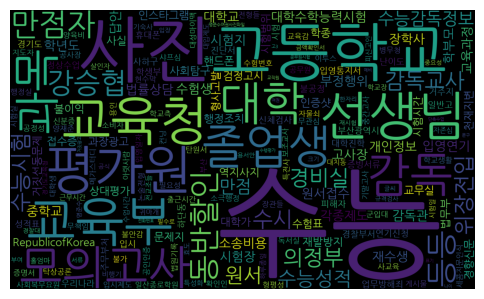

In [50]:
key = ', '.join(data_dict.keys())
print(key)
displayWordCloud(key)

## 빈도수를 적용한 워드클라우드

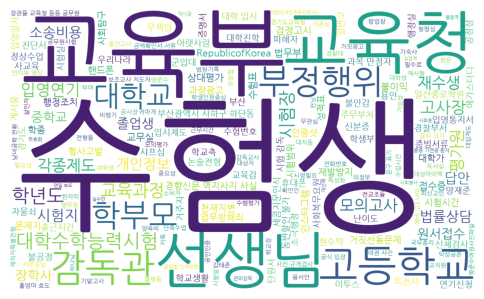

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

stopwords = ["선생님"]
font_path='NanumGothic.ttf'
backgroundcolor = 'white'
    
wc = WordCloud(
                    font_path = font_path, 
                    stopwords = stopwords, 
                    background_color = backgroundcolor, 
                    width = 1280, height = 768, 
                    random_state=42).generate_from_frequencies(data_dict)
                                    # 빈도수에 비례해서 글자 강조
plt.figure(figsize = (6 , 4)) #이미지 크기
plt.imshow(wc)
plt.axis("off")
plt.show() 

## 마스킹을 적용한 워드크라우드

In [57]:
#!pip install WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
img_path = './image/book.png'
cloud_mask = np.array(Image.open(img_path))

In [58]:
cloud_mask   # 픽셀단위

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

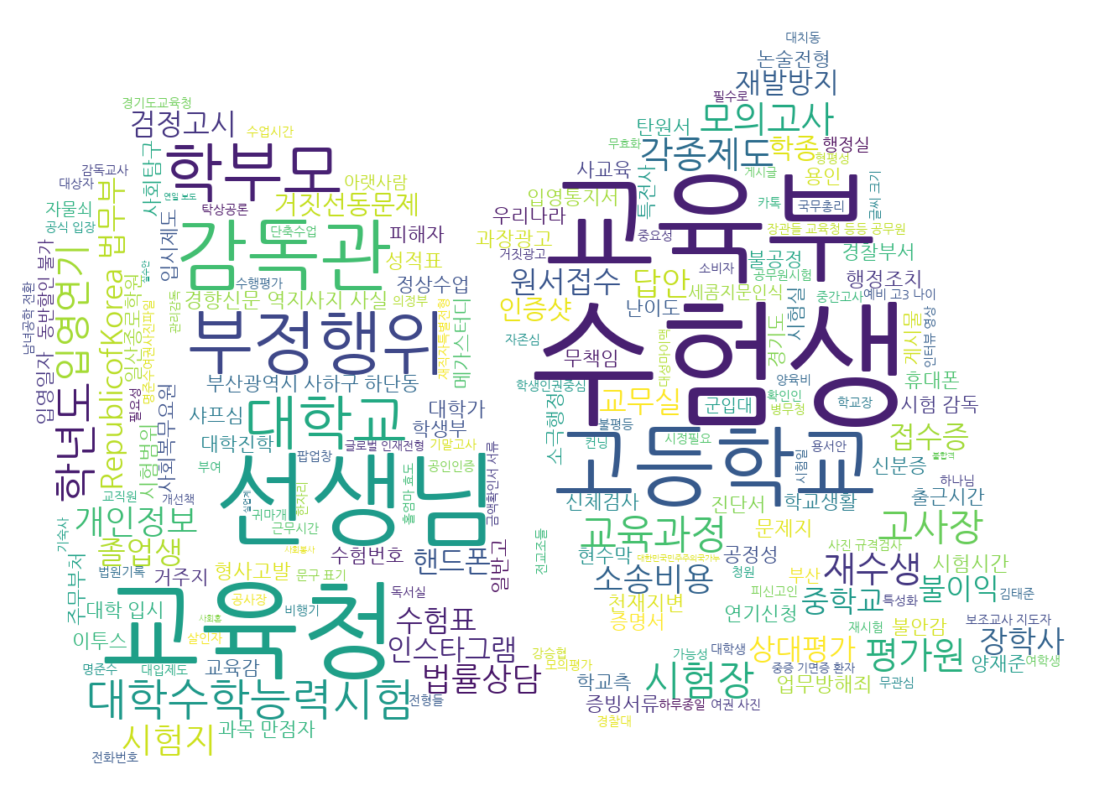

In [59]:
font_path='NanumGothic.ttf'
backgroundcolor = 'white'
    
wc = WordCloud(
                    font_path = font_path, 
                    stopwords = stopwords, 
                    background_color = backgroundcolor, 
                    width = 1280,
                    height = 768, 
                    mask=cloud_mask,    # 마스킹 이미지
                    random_state=42).generate_from_frequencies(data_dict)
plt.figure(figsize = (15 , 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show() 

## 나만의 키워드로 민원빅데이터 분석

In [ ]:
# 나만의 키워드
# 검색건 수 많이
# 마스킹 이미지 적용할 것
# 빈도수 적용할 것
# wordCloud 매개변수 종류 파악하고, 
# API를 참고해서 새로운 매개변수 활용 및 적용
# 워드클라우드 이미지 콘테스트 진행

In [3]:
import pandas as pd
import requests
from urllib import parse
from bs4 import BeautifulSoup

ServiceKey = r'tC3v5Lh6ZoW7dJf6lzw9E13FhLwP5bgJ/cNDkqvzb3Rhj7t6OKUglYGYep5Va4WCJhm1BxXTA+CBURGJs79vZw=='

open_api = 'http://apis.data.go.kr/1140100/minAnalsInfoView5/minWdcloudInfo5'

# params = {'ServiceKey':ServiceKey,'searchword':'비타민','resultCount':50,'target':'pttn,dfpt,saeol','mainSubCd': 1342000, 'dateFrom': 20190101, 'dateTo': 20191231, 'dataType': 'json'}

params = {'ServiceKey':ServiceKey,'searchword':'건강','resultCount':1000,'target':'pttn,dfpt,saeol','dateFrom': 20190101, 'dateTo': 20191231}
res = requests.get(open_api, params=params)

print(res.url)
print(res.status_code)     # 200나오면 성공

if res.status_code != 200:
    print(f"{res.status_code} 에러 발생")

else:
    datas = res.json()

datas

http://apis.data.go.kr/1140100/minAnalsInfoView5/minWdcloudInfo5?ServiceKey=tC3v5Lh6ZoW7dJf6lzw9E13FhLwP5bgJ%2FcNDkqvzb3Rhj7t6OKUglYGYep5Va4WCJhm1BxXTA%2BCBURGJs79vZw%3D%3D&searchword=%EA%B1%B4%EA%B0%95&resultCount=1000&target=pttn%2Cdfpt%2Csaeol&dateFrom=20190101&dateTo=20191231
200


[{'label': '근로자', 'value': 83.85315},
 {'label': '산업안전보건법', 'value': 71.39829},
 {'label': '사업주', 'value': 56.703297},
 {'label': '보험료', 'value': 52.600452},
 {'label': '보건복지부', 'value': 37.09265},
 {'label': '사업장', 'value': 33.368702},
 {'label': '지역가입자', 'value': 22.581818},
 {'label': '보건소', 'value': 19.02242},
 {'label': '미세먼지', 'value': 18.811882},
 {'label': '과태료', 'value': 18.0},
 {'label': '대상자', 'value': 16.863905},
 {'label': '직장가입자', 'value': 16.5},
 {'label': '의료기관', 'value': 15.84},
 {'label': '고소인', 'value': 14.117647},
 {'label': '직장인', 'value': 14.117647},
 {'label': '지방자치단체', 'value': 13.901639},
 {'label': '검진비용', 'value': 13.235294},
 {'label': '운동기구', 'value': 12.93578},
 {'label': '피부양자', 'value': 12.675675},
 {'label': '송전탑', 'value': 12.6},
 {'label': '보건관리자', 'value': 12.5274725},
 {'label': '검사항목', 'value': 12.185185},
 {'label': '국가유공자', 'value': 12.0},
 {'label': '고용노동부', 'value': 11.579832},
 {'label': '수원시', 'value': 10.733334},
 {'label': '혜화 경찰서', 'value'

In [4]:
data_dict = {item['label']: item['value'] for item in datas}
data_dict

{'근로자': 83.85315,
 '산업안전보건법': 71.39829,
 '사업주': 56.703297,
 '보험료': 52.600452,
 '보건복지부': 37.09265,
 '사업장': 33.368702,
 '지역가입자': 22.581818,
 '보건소': 19.02242,
 '미세먼지': 18.811882,
 '과태료': 18.0,
 '대상자': 16.863905,
 '직장가입자': 16.5,
 '의료기관': 15.84,
 '고소인': 14.117647,
 '직장인': 14.117647,
 '지방자치단체': 13.901639,
 '검진비용': 13.235294,
 '운동기구': 12.93578,
 '피부양자': 12.675675,
 '송전탑': 12.6,
 '보건관리자': 12.5274725,
 '검사항목': 12.185185,
 '국가유공자': 12.0,
 '고용노동부': 11.579832,
 '수원시': 10.733334,
 '혜화 경찰서': 10.5,
 '공공기관': 10.434783,
 '증명서': 10.363636,
 '사용중': 10.325582,
 '의료비': 10.105263,
 '건설사': 9.428572,
 '빨간색': 9.428572,
 '지중화': 9.404255,
 '사무직': 9.386666,
 '보건증': 9.305555,
 '국가보훈처장': 9.19403,
 '국민연금': 8.958333,
 '학부모': 8.936171,
 '장현지구 군자봉': 8.8,
 '즉슨 노출시 영향': 8.8,
 '시흥': 8.627451,
 '도시빌라': 8.611111,
 '소액 통장': 8.611111,
 '소액 통장 확인서': 8.571428,
 '개인정보': 8.529411,
 '동의서': 8.529411,
 '고압 송전선로': 8.387096,
 '불법주차': 8.311111,
 '외국인': 8.307693,
 '김용완': 8.076923,
 '국세청': 8.0240965,
 '경기체육회등': 8.0,
 '실내배드민턴장': 8.0,
 '의견

In [8]:
#!pip install WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
img_path = './image/health.png'
cloud_mask = np.array(Image.open(img_path))

cloud_mask   #픽셀 단위

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

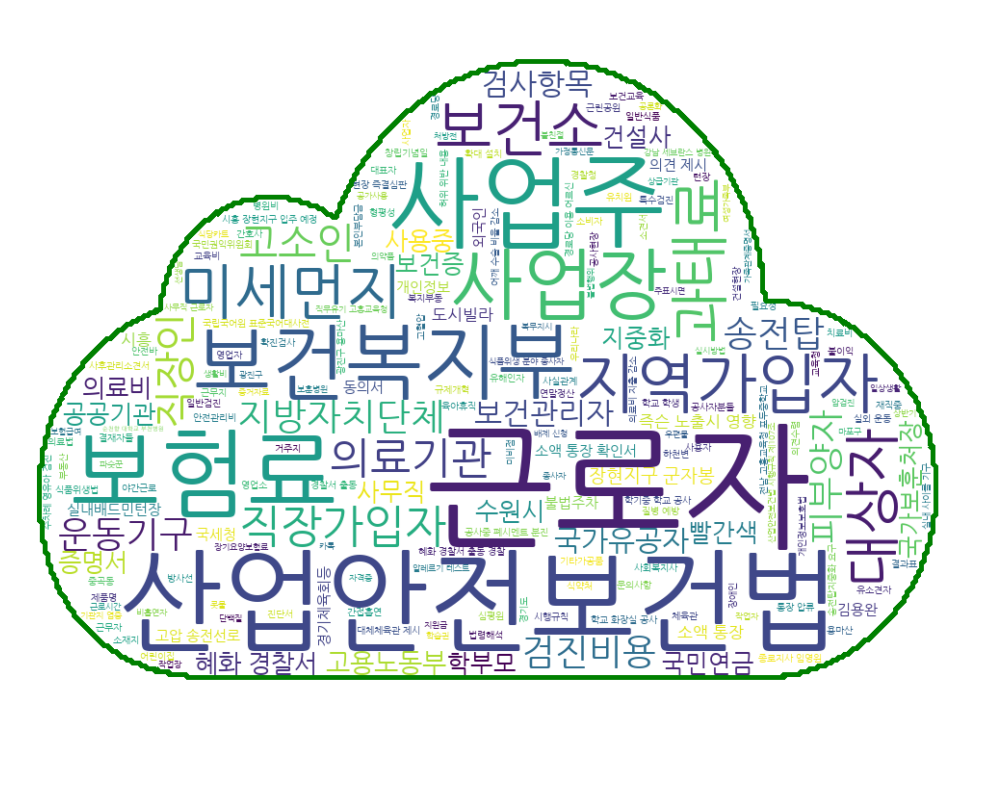

In [10]:
font_path='NanumGothic.ttf'
backgroundcolor = 'white'
stopwords = ["", ""]


wc = WordCloud(
                    font_path = font_path, 
                    stopwords = stopwords, 
                    background_color = backgroundcolor, 
                    width = 1280,
                    height = 768, 
                    mask=cloud_mask,    # 마스킹 이미지
                    random_state=42, contour_width=5, contour_color='Green').generate_from_frequencies(data_dict)
plt.figure(figsize = (15 , 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show() 